<a href="https://colab.research.google.com/github/priyanships31/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [650]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, recall_score, f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
%matplotlib inline
from itertools import combinations
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 

In [651]:
# !pip install matplotlib

In [652]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 4/Capstone Project/data_mobile_price_range.csv')

In [653]:

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### From the data we see that some values are categorical in nature such as blue,dual_sim,four_g,three_g, touch_screen, wifi represented as 0 and 1

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [655]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [656]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [657]:
df1 = df.groupby(by = 'price_range').count()

In [658]:
df1.T

price_range,0,1,2,3
battery_power,500,500,500,500
blue,500,500,500,500
clock_speed,500,500,500,500
dual_sim,500,500,500,500
fc,500,500,500,500
four_g,500,500,500,500
int_memory,500,500,500,500
m_dep,500,500,500,500
mobile_wt,500,500,500,500
n_cores,500,500,500,500


### From this data we can coclude that our dataset is balanced for all the 4 classes

## Detecting and removing outliers if any

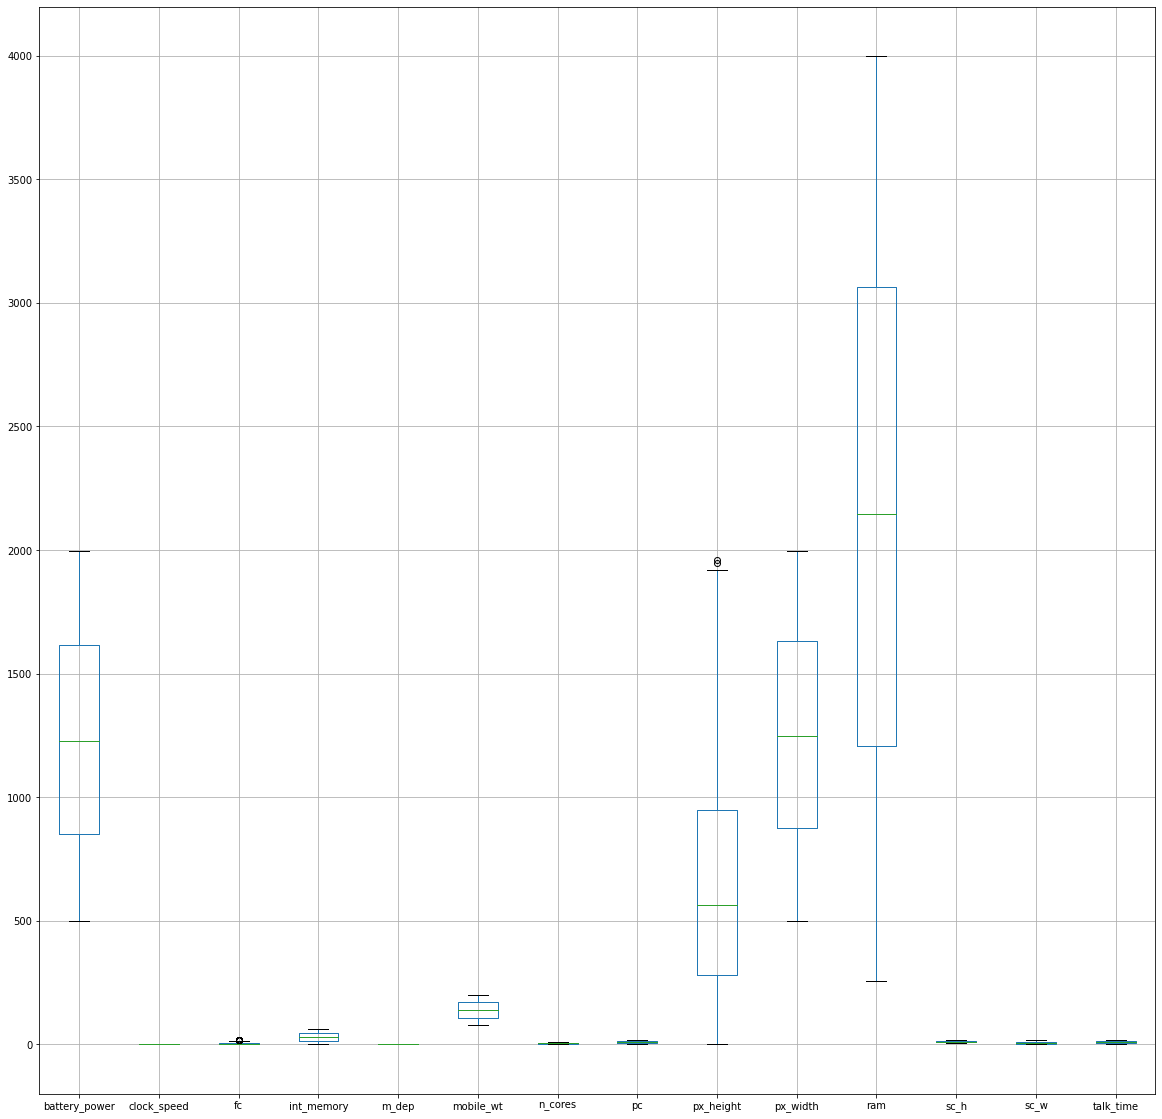

In [659]:
fig = plt.figure(figsize =(20, 20))
data = ['battery_power', 'clock_speed', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
# Creating plot
# plt.boxplot(data)
boxplot = df.boxplot(column=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])

# show plot
plt.show()

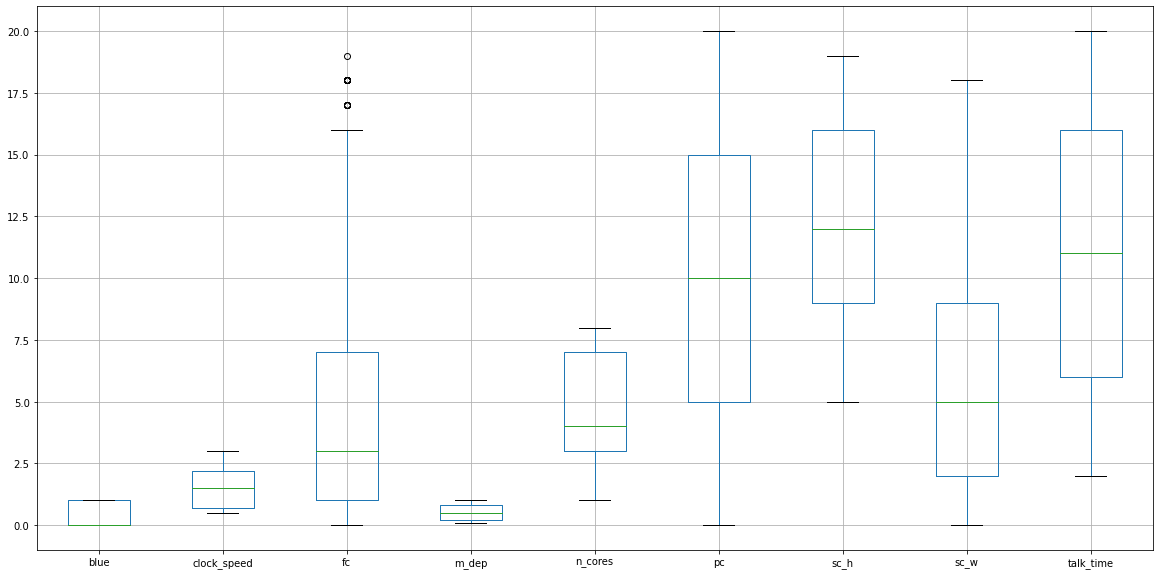

In [660]:
fig = plt.figure(figsize =(20, 10))


boxplot = df.boxplot(column=['blue','clock_speed', 'fc','m_dep','n_cores','pc','sc_h','sc_w','talk_time'])
plt.show()

We can see that we have outliers in px_height and fc

In [705]:
new_df = df.copy()

In [706]:
# Q1 = new_df["col"].quantile(0.01)
Q3 = new_df['fc'].quantile(0.991)

new_df = new_df[(new_df['fc'] <= Q3)]


In [707]:
new_df.shape

(1982, 21)

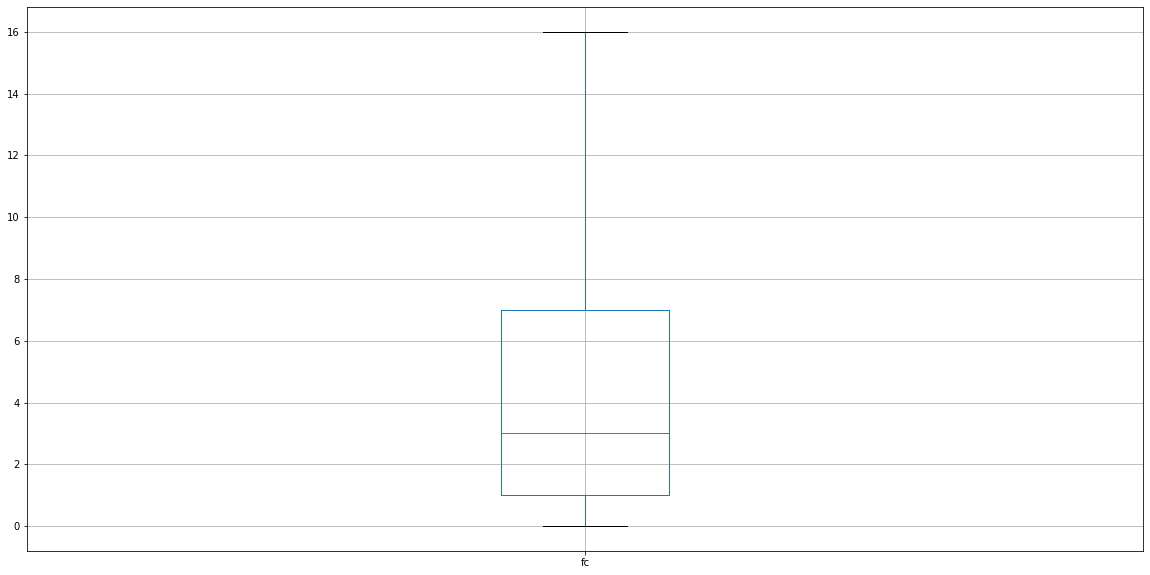

In [708]:
fig = plt.figure(figsize =(20, 10))


boxplot = new_df.boxplot(column=['fc'])
plt.show()

In [709]:
Q3 = new_df['px_height'].quantile(0.999)

new_df = new_df[(new_df['px_height'] <= Q3)]

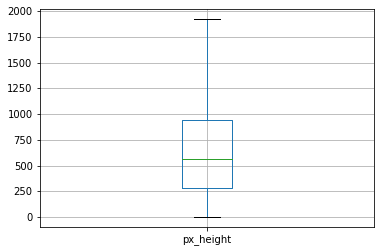

In [710]:
boxplot = new_df.boxplot(column=['px_height'])

# show plot
plt.show()

In [711]:
new_df.shape

(1980, 21)

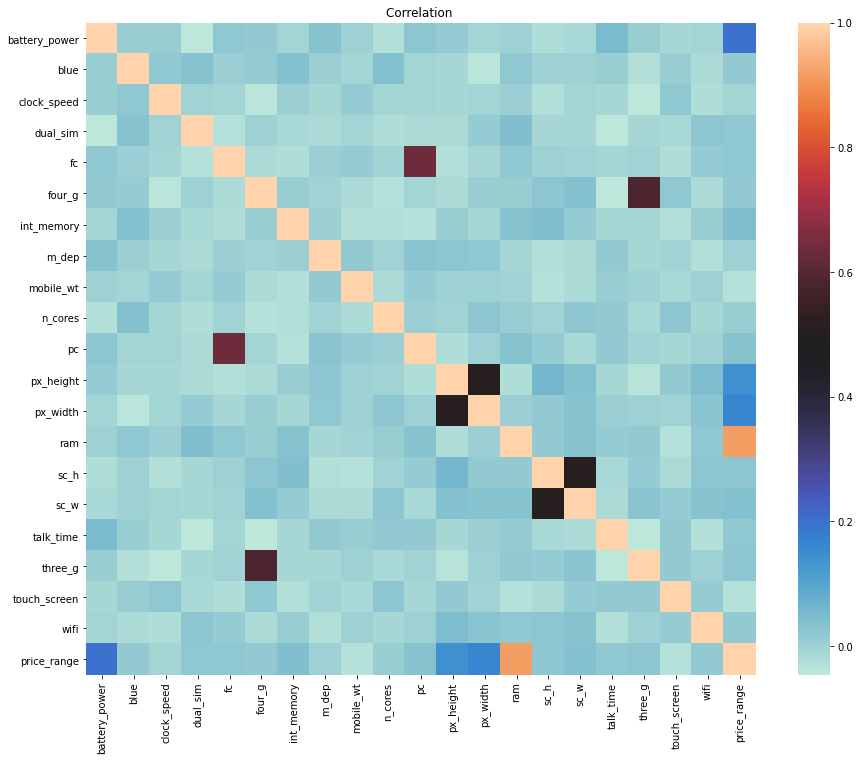

In [712]:
# Finding correlation in our data

import seaborn as sns
import matplotlib.pyplot as plt
corr=new_df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='icefire')
r.set_title("Correlation ")
plt.show()

### Selecting important features

In [716]:
# for categorical response and categorical predictor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# data = pd.read_csv("D://Blogs//train.csv")
X = new_df[['blue','dual_sim','four_g','three_g', 'touch_screen', 'wifi']]  #independent columns
y = new_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(21,'Score')) 

          Specs     Score
4  touch_screen  2.000355
2        four_g  1.853379
1      dual_sim  0.600599
0          blue  0.479060
5          wifi  0.403716
3       three_g  0.352030


In [718]:
# For categorical response and continuous predictor
X = new_df[['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]
y = new_df.iloc[:,-1] 

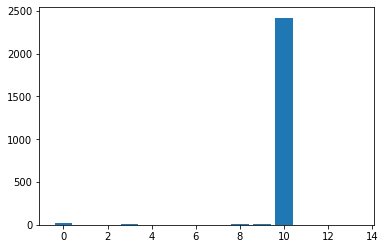

            Specs        Score
0   battery_power    24.641800
1     clock_speed     0.584822
2              fc     0.509259
3      int_memory     4.066940
4           m_dep     2.673142
5       mobile_wt     1.980453
6         n_cores     0.769897
7              pc     0.636563
8       px_height    10.426165
9        px_width    13.718777
10            ram  2419.443534
11           sc_h     1.160781
12           sc_w     1.483696
13      talk_time     1.902398


In [719]:

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
# X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X.columns)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores)

# Exploratory Data Analysis

### Categorical Variables

In [727]:
categorical_variables = ['blue','dual_sim','four_g','three_g', 'touch_screen', 'wifi','n_cores']

####Bluetooth

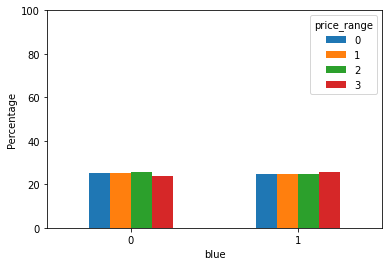

In [720]:
freq_df = new_df.groupby('price_range')['blue'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

#### Dual Sim

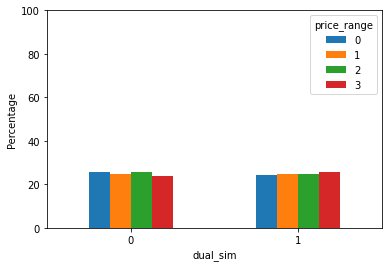

In [721]:
freq_df = new_df.groupby('price_range')['dual_sim'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Four G

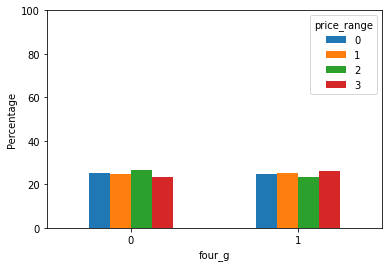

In [722]:
freq_df = new_df.groupby('price_range')['four_g'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Three G

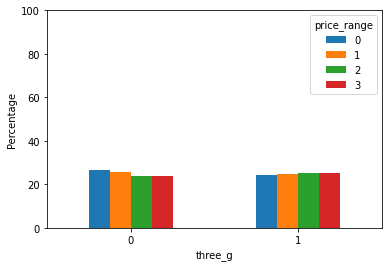

In [723]:
freq_df = new_df.groupby('price_range')['three_g'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####Touch Screen

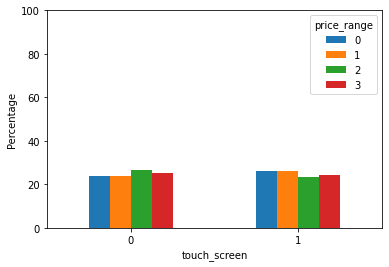

In [724]:
freq_df = new_df.groupby('price_range')['touch_screen'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

####WiFi

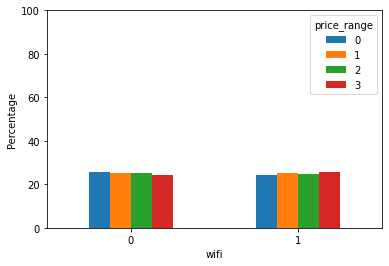

In [725]:
freq_df = new_df.groupby('price_range')['wifi'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

### N Cores

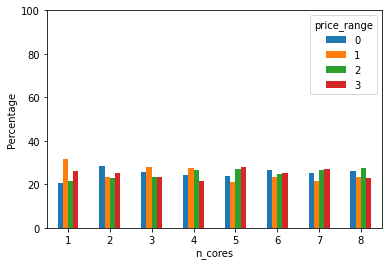

In [726]:
freq_df = new_df.groupby('price_range')['n_cores'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

### Checking correlation amongst the categorical variables

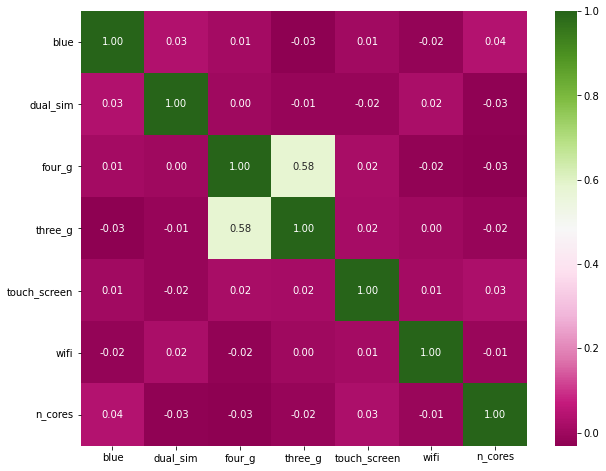

In [728]:
plt.figure(figsize=(10,8))
sns.heatmap(new_df[categorical_variables].corr(), annot=True, fmt=".2f", cmap = 'PiYG');

#### Finding VIF factor

In [729]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [730]:
calc_vif(new_df[categorical_variables])

,variables,VIF
0,blue,1.843478
1,dual_sim,1.857770
2,four_g,3.180902
3,three_g,5.222570
4,touch_screen,1.870131
5,wifi,1.853414
6,n_cores,3.338972


Creating new feature for highly correlated variables

In [731]:
# conditions = []
new_df['3G 4G'] = new_df['four_g'] | new_df['three_g']
# new_df['3G 4G'] = new_df.apply (lambda row: label(row), axis=1)


In [732]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G'],
      dtype='object')

In [733]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

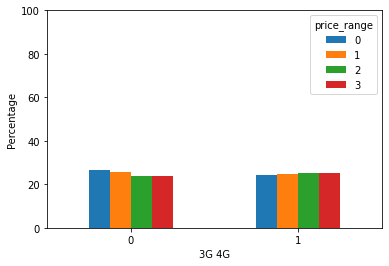

In [734]:
freq_df = new_df.groupby('price_range')['3G 4G'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show();

In [736]:
new_categorical_variables = ['blue','dual_sim','3G 4G', 'touch_screen', 'wifi','n_cores']

#### We can see that both four_g and three_g are highly correlated

## Continuous Variables

In [738]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G'],
      dtype='object')

In [739]:
continuous_variables = ['battery_power','clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt','pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','price_range']

### How continuous variables are affected by price range?

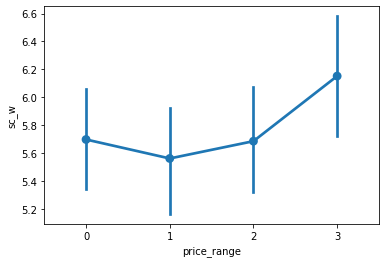

In [740]:
sns.pointplot(y="sc_w", x="price_range", data=new_df)


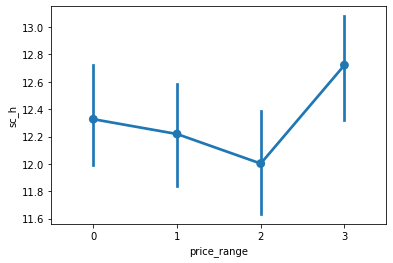

In [741]:
sns.pointplot(y="sc_h", x="price_range", data=new_df)


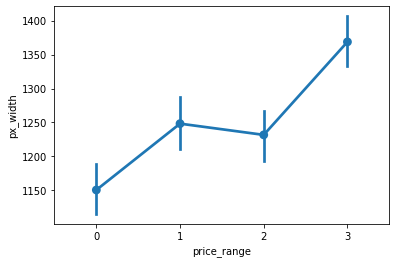

In [742]:
sns.pointplot(y="px_width", x="price_range", data=new_df)


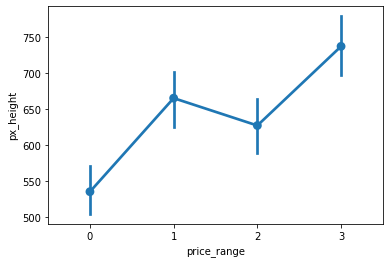

In [743]:
sns.pointplot(y="px_height", x="price_range", data=new_df)


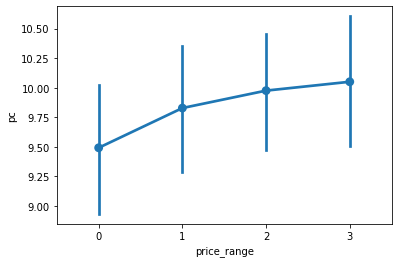

In [744]:
sns.pointplot(y="pc", x="price_range", data=new_df)


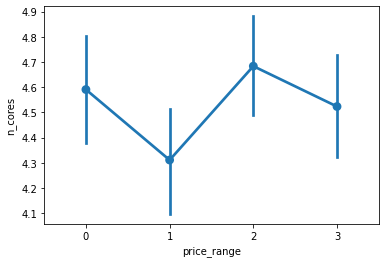

In [745]:
sns.pointplot(y="n_cores", x="price_range", data=new_df)


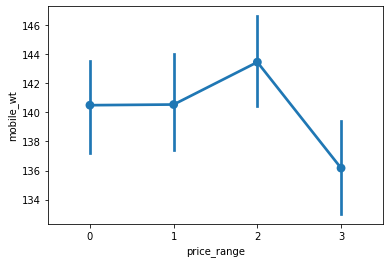

In [746]:
sns.pointplot(y="mobile_wt", x="price_range", data=new_df)


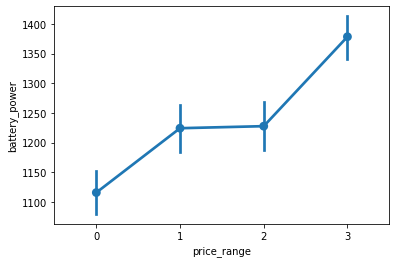

In [747]:
sns.pointplot(y="battery_power", x="price_range", data=new_df)


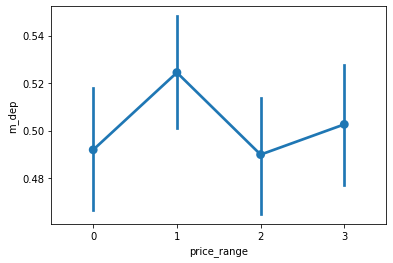

In [748]:
# df.plot(x='price_range', y='battery_power', kind='scatter')
# plt.show()

sns.pointplot(y="m_dep", x="price_range", data=new_df)


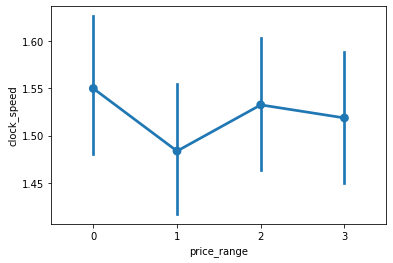

In [749]:
# df.plot(x='price_range', y='clock_speed', kind='scatter')
# plt.show()
sns.pointplot(y="clock_speed", x="price_range", data=new_df)


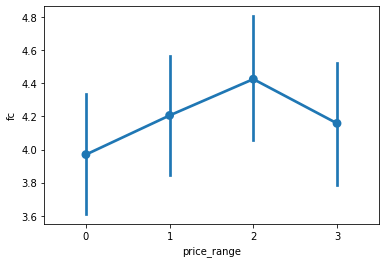

In [750]:
# df.plot(x='price_range', y='fc', kind='scatter')
# plt.show()

sns.pointplot(y="fc", x="price_range", data=new_df)


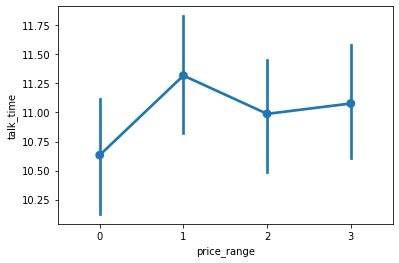

In [751]:
sns.pointplot(y="talk_time", x="price_range", data=new_df)


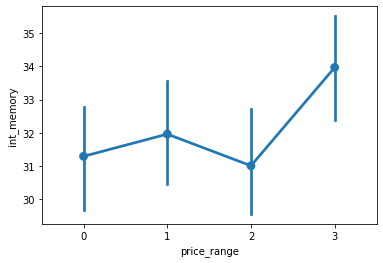

In [752]:
sns.pointplot(y="int_memory", x="price_range", data=new_df)


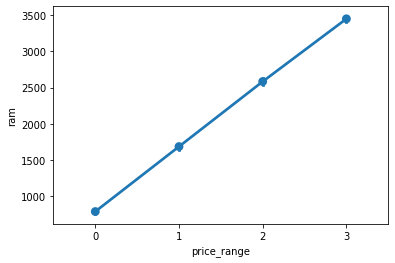

In [753]:
# plt.figure(figsize=(20,10))
sns.pointplot(y="ram", x="price_range", data=new_df)
plt.show()

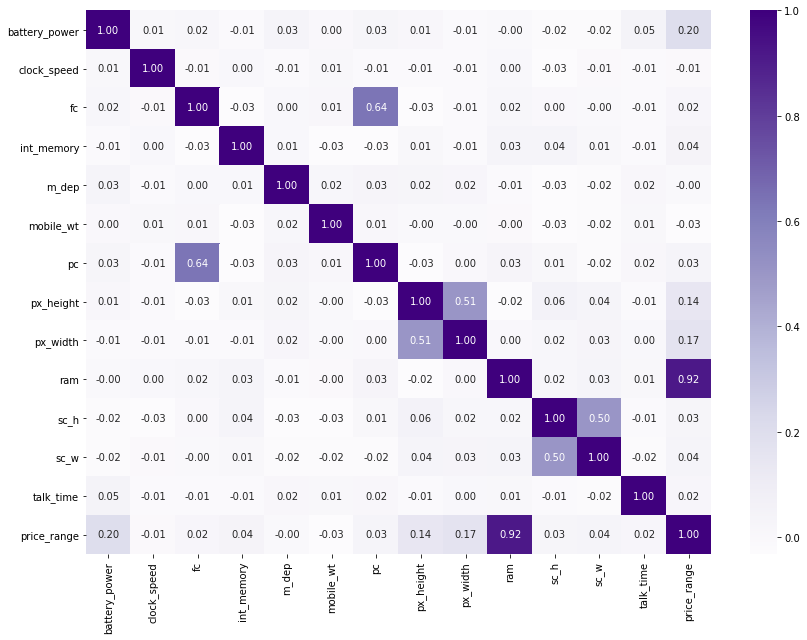

In [754]:
plt.figure(figsize=(14,10))
sns.heatmap(new_df[continuous_variables].corr(), annot=True, fmt=".2f",cmap = 'Purples');


In [755]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [756]:
calc_vif(new_df[continuous_variables])

,variables,VIF
0,battery_power,9.349493
1,clock_speed,4.316060
2,fc,3.379536
3,int_memory,3.958702
4,m_dep,3.938602
5,mobile_wt,14.416305
6,pc,6.106546
7,px_height,4.573888
8,px_width,11.453119
9,ram,37.042677


High correlation between:

pc and fc around 0.6

px_width and px_height around 0.5

sc_h and sc_w around 0.5

price_range and ram around 0.9

### Creating new features with high correlation

In [602]:
# new_df['total cam pixels'] = df['pc'] + df['fc']

In [758]:
new_df['area'] = df['sc_h']*df['sc_w']

In [759]:
new_df['pixel_area'] = new_df['px_height']*new_df['px_width']

In [757]:
new_continuous_variables = ['battery_power','clock_speed', 'pc','fc','area','pixel_area',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores',  'ram', 'talk_time','price_range']

In [766]:
new_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G', 'area', 'pixel_area'],
      dtype='object')

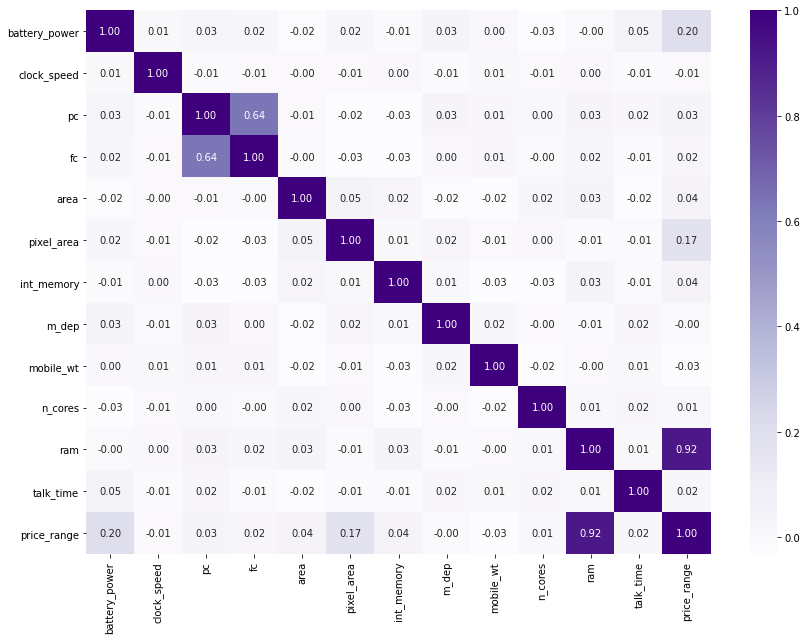

In [761]:
plt.figure(figsize=(14,10))
sns.heatmap(new_df[new_continuous_variables].corr(), annot=True, fmt=".2f",cmap = 'Purples');

In [609]:
# fig = plt.figure(figsize =(10, 10))
# boxplot = df.boxplot(column=['blue'])

# plt.show()

## Splitting the data

In [780]:
from sklearn import preprocessing
from sklearn import utils

import pandas as pd

lab_enc = preprocessing.LabelEncoder()

# housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
d = preprocessing.normalize(new_df)
scaled_df = pd.DataFrame(d, columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', '3G 4G', 'area', 'pixel_area'])
scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,3G 4G,area,pixel_area
0,0.054759,0.000000e+00,1.430767e-04,0.000000e+00,6.503488e-05,0.000000e+00,0.000455,3.902093e-05,0.012227,0.000130,0.000130,0.001301,0.049166,0.165774,0.000585,4.552442e-04,0.001236,0.000000e+00,0.000000e+00,0.000065,6.503488e-05,0.000000e+00,0.004097,0.983327
1,0.000567,5.558200e-07,2.779100e-07,5.558200e-07,0.000000e+00,5.558200e-07,0.000029,3.890740e-07,0.000076,0.000002,0.000003,0.000503,0.001105,0.001462,0.000009,1.667460e-06,0.000004,5.558200e-07,5.558200e-07,0.000000,1.111640e-06,5.558200e-07,0.000028,0.999998
2,0.000260,4.614013e-07,2.307007e-07,4.614013e-07,9.228026e-07,4.614013e-07,0.000019,4.152612e-07,0.000067,0.000002,0.000003,0.000583,0.000792,0.001201,0.000005,9.228026e-07,0.000004,4.614013e-07,4.614013e-07,0.000000,9.228026e-07,4.614013e-07,0.000010,0.999999
3,0.000283,4.604520e-07,1.151130e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000005,3.683616e-07,0.000060,0.000003,0.000004,0.000560,0.000822,0.001275,0.000007,3.683616e-06,0.000005,4.604520e-07,0.000000e+00,0.000000,9.209040e-07,4.604520e-07,0.000059,0.999999
4,0.001244,6.830140e-07,8.196168e-07,0.000000e+00,8.879182e-06,6.830140e-07,0.000030,4.098084e-07,0.000096,0.000001,0.000010,0.000825,0.000828,0.000964,0.000005,1.366028e-06,0.000010,6.830140e-07,6.830140e-07,0.000000,6.830140e-07,6.830140e-07,0.000011,0.999998


In [772]:
scaled_df = scaled_df.drop(['four_g','three_g','px_height','px_width','sc_h','sc_w'],axis = 1)

In [773]:
scaled_df.shape

(1980, 18)

In [781]:
X = new_df.drop(["price_range"], axis=1)
y = new_df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [782]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [783]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [784]:
dtree.score(X_test,y_test)

0.8459595959595959

## Using K Nearest Neighbours

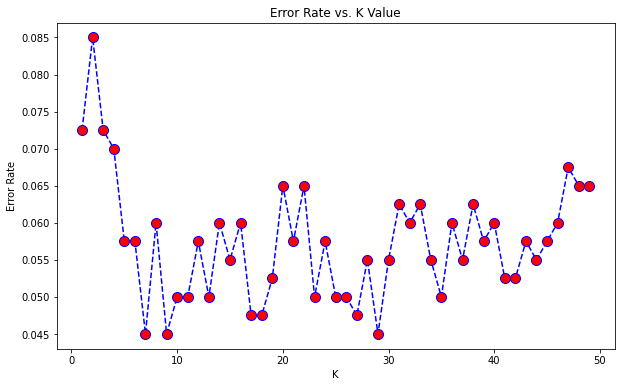

Minimum error:- 0.045 at K = 6


In [614]:
# Finding the minimum error in Knn for different values of n
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.955 at K = 6


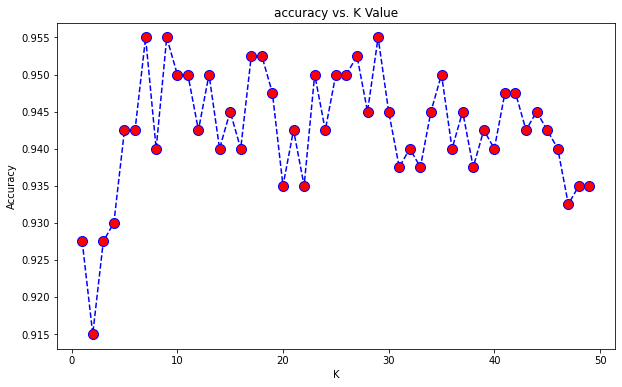

In [615]:
# Finding maxiumn accuracy at different values of n
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [616]:
# model scoring at n = 6

knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
knn.score(X_test, y_test)


0.9425

In [617]:
# using cross validation on knn and finding model score

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=6)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(f'cv_scores mean:{np.mean(cv_scores)}')
# print(classification_report(y_test, pipe.predict(X_test)))

[0.9175 0.94   0.92   0.9225 0.9025]
cv_scores mean:0.9205


In [618]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors" : np.arange(1,50),
              "leaf_size" : np.arange(1,50)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
random_search = RandomizedSearchCV(knn, knn_params, cv=cv, random_state=1, n_jobs=-1, verbose=2 )
#grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=2)
pipe = make_pipeline(random_search)
pipe.fit(X_train, y_train)
print('                 Classification report \n')

print(classification_report(y_test, pipe.predict(X_test)))

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.9s


                 Classification report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.93      0.96      0.94        91
           2       0.90      0.92      0.91        92
           3       0.98      0.93      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   12.4s finished


In [785]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [786]:
rfc.score(X_test,y_test)


0.8762626262626263